## Logistic Regression

> although regression it comes under classification models

- produces results in a binary format which is used to predict the outcome of a categorical dependent variable. So the outcome should be discrete/categorical such as: 0/1, high/low, true/false, etc
- sigmoidal curve
- threshold value
- linear regression vs logistic regression

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [56]:
df = pd.read_csv("../DataSets/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [58]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [59]:
df.isnull().sum()



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [60]:
df.dropna(inplace=True)

<Axes: xlabel='Survived', ylabel='count'>

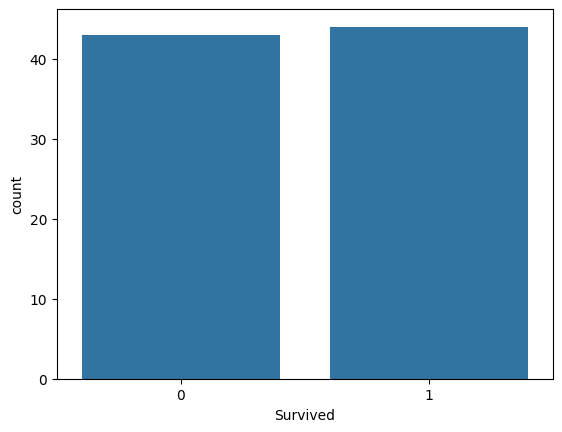

In [61]:
sns.countplot(x="Survived", data=df)

<Axes: xlabel='Survived', ylabel='count'>

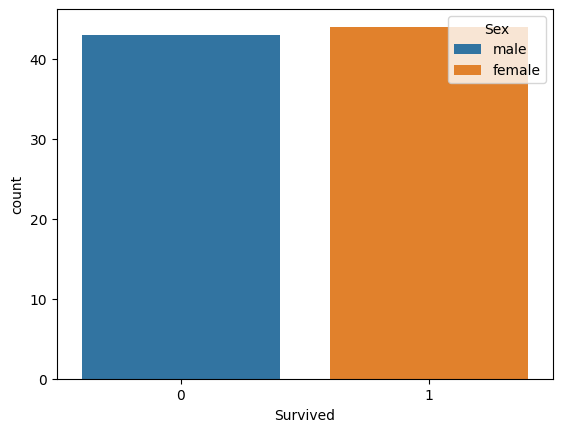

In [62]:
sns.countplot(x="Survived", hue="Sex", data=df)

<Axes: xlabel='Survived', ylabel='count'>

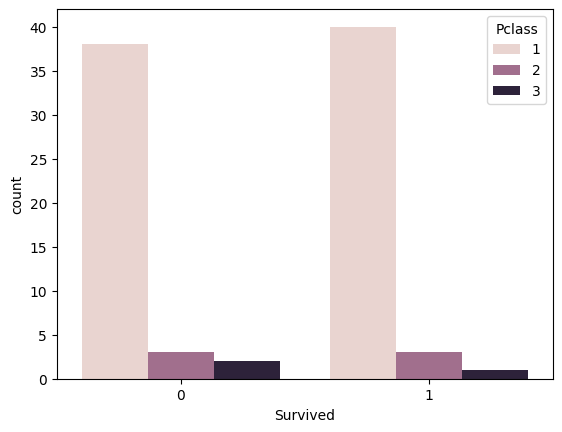

In [63]:
sns.countplot(x="Survived", hue="Pclass", data=df)

In [64]:
#hisplot from sns to show the distribution of the age.

In [65]:
df.isnull()[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,False,False,False,False,False,False,False,False,False,False,False,False
14,False,False,False,False,False,False,False,False,False,False,False,False
24,False,False,False,False,False,False,False,False,False,False,False,False
26,False,False,False,False,False,False,False,False,False,False,False,False
28,False,False,False,False,False,False,False,False,False,False,False,False
34,False,False,False,False,False,False,False,False,False,False,False,False
44,False,False,False,False,False,False,False,False,False,False,False,False
46,False,False,False,False,False,False,False,False,False,False,False,False
48,False,False,False,False,False,False,False,False,False,False,False,False
50,False,False,False,False,False,False,False,False,False,False,False,False


In [66]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [67]:
df.drop('PassengerId', axis=1, inplace=True)

In [68]:
df.drop('Cabin', axis=1, inplace=True)

In [69]:
sex = pd.get_dummies(df['Sex'], dtype = int, drop_first = True)
sex.head()

,male
12,0
14,0
24,0
26,0
28,1


In [70]:
embark = pd.get_dummies(df['Embarked'], dtype = int, drop_first = True)
embark.head()

,Q,S
12,0,1
14,0,1
24,0,0
26,0,0
28,0,1


In [71]:
pcl = pd.get_dummies(df['Pclass'], dtype = int, drop_first = True)
pcl.head()

,2,3
12,0,0
14,0,0
24,0,0
26,0,0
28,0,0


In [72]:
df = pd.concat([df,sex,pcl,embark], axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,2,3,Q,S
12,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,S,0,0,0,0,1
14,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,S,0,0,0,0,1
24,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,C,0,0,0,0,0
26,1,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,C,0,0,0,0,0
28,0,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,S,1,0,0,0,1


In [73]:
df.drop(['Pclass', 'Name', 'Ticket', 'Sex', 'Embarked'], axis=1, inplace=True)
df.head()

,Survived,Age,SibSp,Parch,Fare,male,2,3,Q,S
12,1,23.0,1,0,82.2667,0,0,0,0,1
14,1,47.0,1,0,61.1750,0,0,0,0,1
24,1,48.0,1,3,262.3750,0,0,0,0,0
26,1,22.0,0,1,61.9792,0,0,0,0,0
28,0,41.0,0,0,30.5000,1,0,0,0,1


In [74]:
X = df.drop('Survived', axis=1)
y = df['Survived']

print(X.head())
print(y.head())

     Age  SibSp  Parch      Fare  male  2  3  Q  S
12  23.0      1      0   82.2667     0  0  0  0  1
14  47.0      1      0   61.1750     0  0  0  0  1
24  48.0      1      3  262.3750     0  0  0  0  0
26  22.0      0      1   61.9792     0  0  0  0  0
28  41.0      0      0   30.5000     1  0  0  0  1
12    1
14    1
24    1
26    1
28    0
Name: Survived, dtype: int64


In [75]:
X.rename(columns={2: 'Pclass_2', 3: 'Pclass_3'}, inplace=True)
y.value_counts()

print('Survived' in X.columns)


False


In [76]:
import pandas as pd

corr = pd.concat([X, y], axis=1).corr()
print(corr['Survived'].sort_values(ascending=False))

Survived    1.000000
Parch       0.181554
Fare        0.179047
SibSp       0.170596
Q           0.106600
S           0.058981
Age         0.022983
Pclass_2   -0.003129
Pclass_3   -0.065171
male       -1.000000
Name: Survived, dtype: float64


In [77]:
# as the male column is fully negatively correlated with survival, we can drop it
X.drop(columns=['male'], inplace=True)
X.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Q,S
12,23.0,1,0,82.2667,0,0,0,1
14,47.0,1,0,61.1750,0,0,0,1
24,48.0,1,3,262.3750,0,0,0,0
26,22.0,0,1,61.9792,0,0,0,0
28,41.0,0,0,30.5000,0,0,0,1


In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

print(X_train.equals(X_test))
print(y_train.equals(y_test))

X_train.isnull().sum()

False
False


Age         0
SibSp       0
Parch       0
Fare        0
Pclass_2    0
Pclass_3    0
Q           0
S           0
dtype: int64

In [79]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [80]:
predictor = logmodel.predict(X_test)

predictor

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1])